In [1]:
### IMPORT LIBRARIES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### IMPORT AND CLEAN DATASET
games = pd.read_csv("C:/Users/david/OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli/David Master/Python and R for Data Science/Python Documentation/games.csv")

games.head() 

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [3]:
games.describe()
games.info(verbose = True)

games.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


(1512, 14)

In [4]:
# Getting some descriptive statistics 

games.describe()

,Unnamed: 0,Rating
count,1512.000000,1499.000000
mean,755.500000,3.719346
std,436.621117,0.532608
min,0.000000,0.700000
25%,377.750000,3.400000
50%,755.500000,3.800000
75%,1133.250000,4.100000
max,1511.000000,4.800000


In [5]:
# Null Value

games.isnull().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [6]:
# Duplicated values

games.duplicated().any()

False

In [7]:
# Duplicated Games

dup_games = games.duplicated(subset = 'Title')
games = games.drop(games[dup_games].index)

In [8]:
## Drop extra index column and summary and reviews since performing text analysis is outside the scope of this project

games_v2 = games.drop(columns = ['Unnamed: 0', 'Summary']) 

# Drop nulls
games_clean = games_v2.dropna() 

In [9]:
# Number of reviews and times listed convey the same information
games = games.drop(["Times Listed"],axis = 1)

In [10]:
def k_to_int(value):
    """
    Converts string values into integers the represent.

    Parameters
    ----------
    value : string
        String value that represent an integer.

    Returns
    -------
    Integer.
    
    Example
    -------
    > k_to_int(3.9k)
    > 3900

    """
    if 'k' or 'K' in value:      
        value = value.replace('K', '').replace('k', '')      
        if '.' in value:          
            return int(float(value) * 1000)  
        else:   
            return int(value) * 1000        
    else:       
        return int(value)

In [11]:
# Converting k values

k_columns = ['Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist', "Times Listed"]
games_clean[k_columns] = games_clean[k_columns].applymap(k_to_int)

C:\Users\david\AppData\Local\Temp\ipykernel_6100\719368799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean[k_columns] = games_clean[k_columns].applymap(k_to_int)


In [12]:
## Looking at Release Dates

unique_dates = games_clean['Release Date'].value_counts()
print(unique_dates)

games_clean.loc[games_clean['Release Date'] == 'releases on TBD']

Nov 12, 2020    5
Oct 28, 2022    3
Nov 18, 2016    3
Nov 18, 2022    3
Nov 19, 2006    3
               ..
Aug 23, 2011    1
Nov 21, 2000    1
Sep 28, 2021    1
Jul 28, 2012    1
Feb 04, 2014    1
Name: Release Date, Length: 961, dtype: int64


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Reviews,Plays,Playing,Backlogs,Wishlist
644,Deltarune,releases on TBD,['tobyfox'],4.3,313000,313000,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","['Spamton is so hot, I want to kiss him in the...",1300,83000,468000,617000
1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18000,18000,"['Adventure', 'RPG']",['I really loved that they integrated Family G...,1000,0,39000,146000


In [13]:
# Remove rows with "release in TBD" as Release Date value

games_clean = games_clean.loc[games_clean['Release Date'] != 'releases on TBD']

In [14]:
# Adding Columns

games_clean['Release Date'] = pd.to_datetime(games_clean['Release Date'], format='%b %d, %Y')

def get_season(date):
    """
    Takes a date as an input and returns the season of the date

    Parameters
    ----------
    date : TYPE
        DESCRIPTION.

    Returns
    -------
    str
        DESCRIPTION.

    """
    
    month = date.month
    
    if 3 <= month <= 5:return 'Spring'
    elif 6 <= month <= 8: return 'Summer'
    elif 9 <= month <= 11:return 'Fall'
    else: return'Winter'
    
games_clean['Season'] = games_clean['Release Date'].apply(get_season)
games_clean['Release Month'] = games_clean['Release Date'].dt.strftime('%b')
games_clean['Release Year'] = games_clean['Release Date'].dt.year

games_clean.drop('Release Date', axis=1, inplace=True)

In [15]:
# Title adjustments

# Different games but with same title
unique_games = games_clean['Title'].value_counts()
print(unique_games)

dup_titles_index = games_clean['Title'].duplicated()

games_clean.loc[dup_titles_index, 'Title'] = games_clean[dup_titles_index]['Title'] + ' (' + games_clean[dup_titles_index]['Release Year'].astype(str) + ')'

Elden Ring                       1
Splatoon                         1
Chrono Cross                     1
Fire Emblem: Path of Radiance    1
Kingdom Hearts Final Mix         1
                                ..
Pokémon Sun                      1
Yu-Gi-Oh! Master Duel            1
Injustice: Gods Among Us         1
Pac-Man                          1
The LEGO Movie Videogame         1
Name: Title, Length: 1083, dtype: int64


In [16]:
# Still duplicates
unique_games = games_clean['Title'].value_counts()
print(unique_games)

games_clean = games_clean.drop_duplicates(subset = ['Title'])

Elden Ring                       1
Splatoon                         1
Chrono Cross                     1
Fire Emblem: Path of Radiance    1
Kingdom Hearts Final Mix         1
                                ..
Pokémon Sun                      1
Yu-Gi-Oh! Master Duel            1
Injustice: Gods Among Us         1
Pac-Man                          1
The LEGO Movie Videogame         1
Name: Title, Length: 1083, dtype: int64


In [17]:
# Genre & Team -> Changed to keep spaces per Companye (i.e. BandaiNamco -> Bandai Namco)
genres_dict = {}

# Iterate through the 'Genres' column
for genre_list in games_clean['Genres']:
    
    # The variables within the Genres column are seen as lists, but the type is actually
    # string, so we must remove the brackets and quotes, and then seperate the two
    # in order to be able to get the individual genres as keys
    genre_list = genre_list.replace('[', '').replace(' ','').replace(']', '').replace("'", '').split(',')
    
    # Iterate through individual genres in the list
    for genre in genre_list:
        
        if genre != '':
            if genre in genres_dict:
                genres_dict[genre] += 1
            else:
                genres_dict[genre] = 1

print(genres_dict)

{'Adventure': 704, 'RPG': 353, 'Brawler': 103, 'Indie': 205, 'TurnBasedStrategy': 70, 'Platform': 236, 'Simulator': 92, 'Strategy': 114, 'Puzzle': 127, 'Shooter': 254, 'Music': 20, 'Fighting': 63, 'Arcade': 59, 'VisualNovel': 51, 'Card&BoardGame': 13, 'Tactical': 42, 'Racing': 37, 'Point-and-Click': 36, 'MOBA': 2, 'Sport': 20, 'RealTimeStrategy': 9, 'Quiz/Trivia': 3, 'Pinball': 1}


In [18]:
# Function to convert string representation of lists to actual lists
import ast

def convert_to_list(string_list):
    
    # Using ast.literal_eval to safely evaluate the string as a literal expression
    return ast.literal_eval(string_list)

games_clean['Team'] = games_clean['Team'].apply(convert_to_list)

#Same logic for Teams column
team_dict = {}
    
# Iterate through the 'Team' column
for team_list in games_clean['Team']:    
    
    # Iterate through individual teams in the list
    for team in team_list:        
        if team[0] == ' ': 
            team = team[1:]
        if team != '':
            if team in team_dict:
                team_dict[team] += 1
            else:
                team_dict[team] = 1

In [19]:
# Update dataframe name
games = games_clean

In [20]:
#View number unique Teams
print(len(team_dict))

655


In [21]:
#Get the first genre of each title as seperate variable columns
genre_lst = []

for genre in games_clean['Genres']:
    genre = genre.replace("[", '').replace("]", '').replace(",","").replace("'","").split(" ")
    genre_lst.append(genre[0])  

games_clean["Genres"] = genre_lst  

In [22]:
# A try to use a bag of words aproach to identify if the review text has specific sentients potentially impacting the rating
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation

# getting a bag-of-words representation using CountVectorizer
vec = CountVectorizer()
bag = vec.fit_transform(games_clean['Reviews'])

# use k-means clustering
clusters = 2 
k_means = KMeans(n_clusters=clusters, random_state=30)
games_clean['Sentiment'] = k_means.fit_predict(bag)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
games_clean.head()

,Title,Team,Rating,Times Listed,Number of Reviews,Genres,Reviews,Plays,Playing,Backlogs,Wishlist,Season,Release Month,Release Year,Sentiment
0,Elden Ring,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,Adventure,"[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,Winter,Feb,2022,0
1,Hades,[Supergiant Games],4.3,2900,2900,Adventure,['convinced this is a roguelike for people who...,21000,3200,6300,3600,Winter,Dec,2019,1
2,The Legend of Zelda: Breath of the Wild,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,4300,Adventure,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600,Spring,Mar,2017,0
3,Undertale,"[tobyfox, 8-4]",4.2,3500,3500,Adventure,['soundtrack is tied for #1 with nier automata...,28000,679000,4900,1800,Fall,Sep,2015,0
4,Hollow Knight,[Team Cherry],4.4,3000,3000,Adventure,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300,Winter,Feb,2017,1


In [24]:
###################### EXPLORATORY STATISTICS ######################

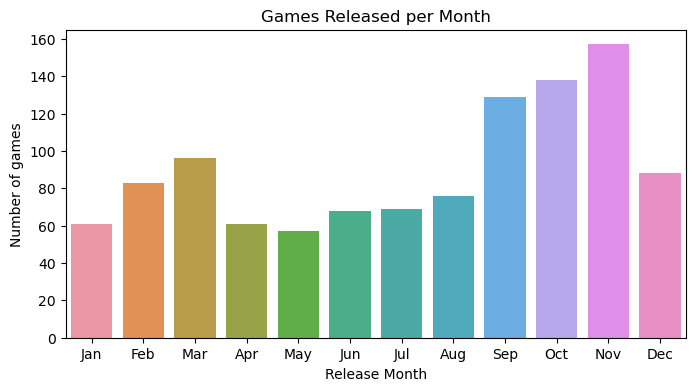

In [25]:
## Plot Games per month

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

games_per_month = games.groupby('Release Month').size().reindex(months)
games_per_month = pd.DataFrame({'Release Month': months, 'Number of Games': games_per_month.values})
plt.figure(figsize = (8, 4))
plt.title('Games Released per Month')
sns.barplot(data = games_per_month, x = 'Release Month' , y = 'Number of Games')
plt.xlabel('Release Month')
plt.ylabel('Number of games')

plt.show()

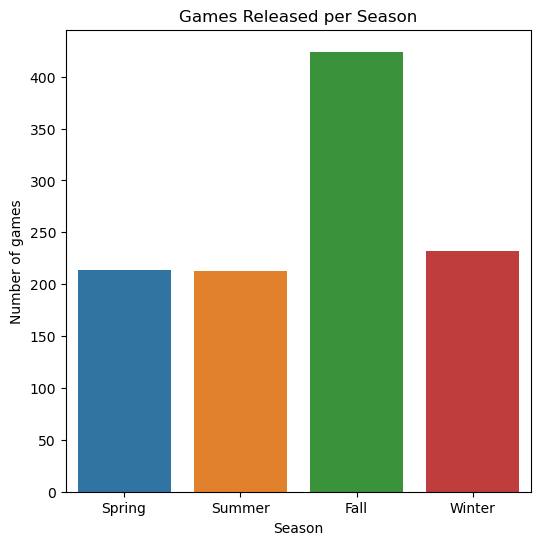

In [26]:
## Games per season

seasons = ['Spring', 'Summer', 'Fall', 'Winter']
games_per_season = games.groupby('Season').size().reindex(seasons)
games_per_season = pd.DataFrame({'Season': seasons, 'Number of Games': games_per_season.values})
plt.figure(figsize = (6, 6))
plt.title('Games Released per Season')
sns.barplot(data = games_per_season, x ='Season', y = 'Number of Games')
plt.xlabel('Season')
plt.ylabel('Number of games')

plt.show()

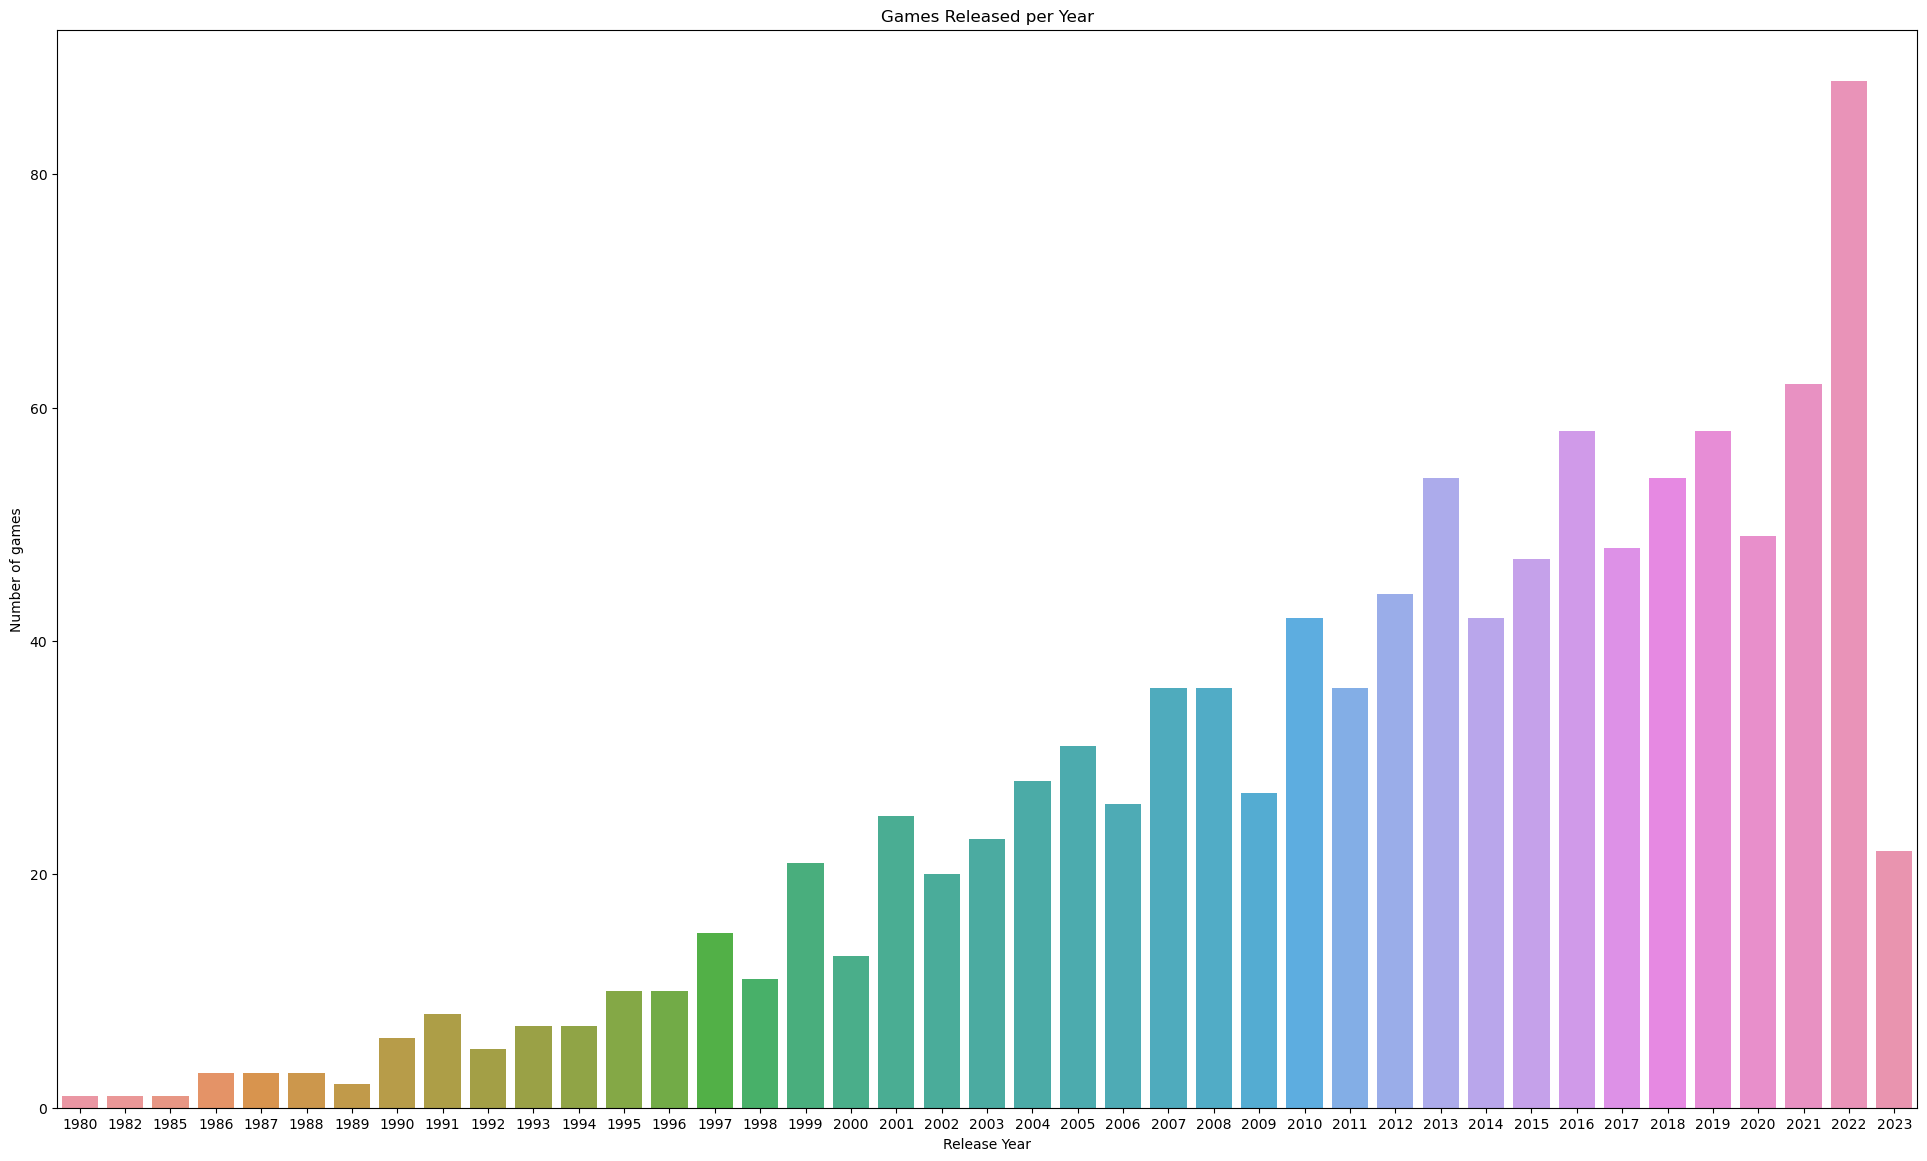

In [27]:
## Games per year

games_per_year = games['Release Year'].value_counts().reset_index()
games_per_year.columns = ['Release Year', 'Number of Games']
plt.figure(figsize = (24, 14))
plt.title('Games Released per Year')
sns.barplot(data = games_per_year, x ='Release Year', y = 'Number of Games')
plt.xlabel('Release Year')
plt.ylabel('Number of games')

plt.show()

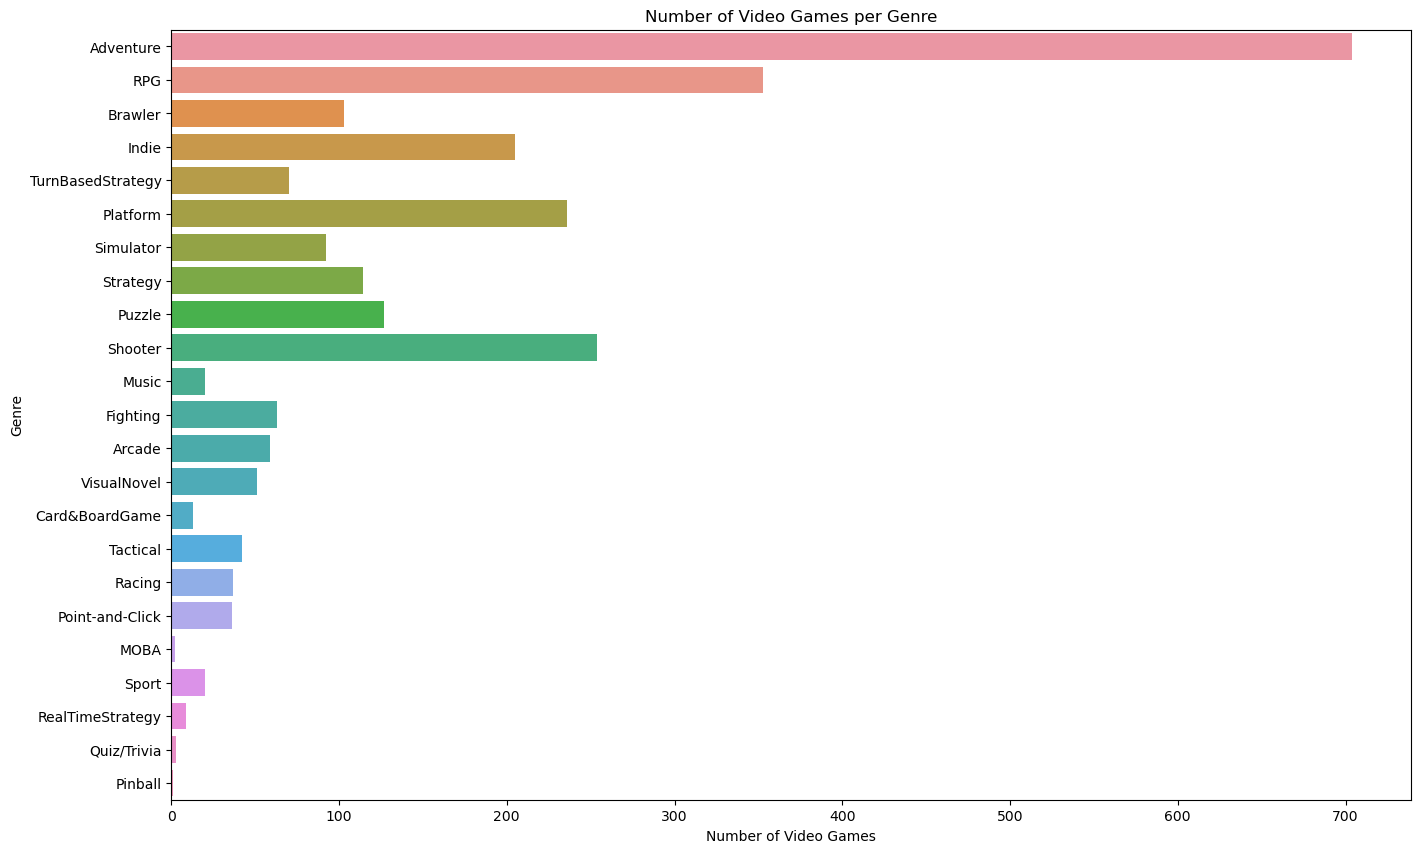

In [28]:
## Genres Total

genres_list = list(genres_dict.keys())
genres_count_list = list(genres_dict.values())
df_genres = pd.DataFrame({'Genre': genres_list, 'Number of Video Games': genres_count_list})
plt.figure(figsize = (16, 10))
sns.barplot(data = df_genres, x = 'Number of Video Games', y = 'Genre', orient = 'horizontal')
plt.xlabel('Number of Video Games')
plt.ylabel('Genre')
plt.title('Number of Video Games per Genre')

plt.show()

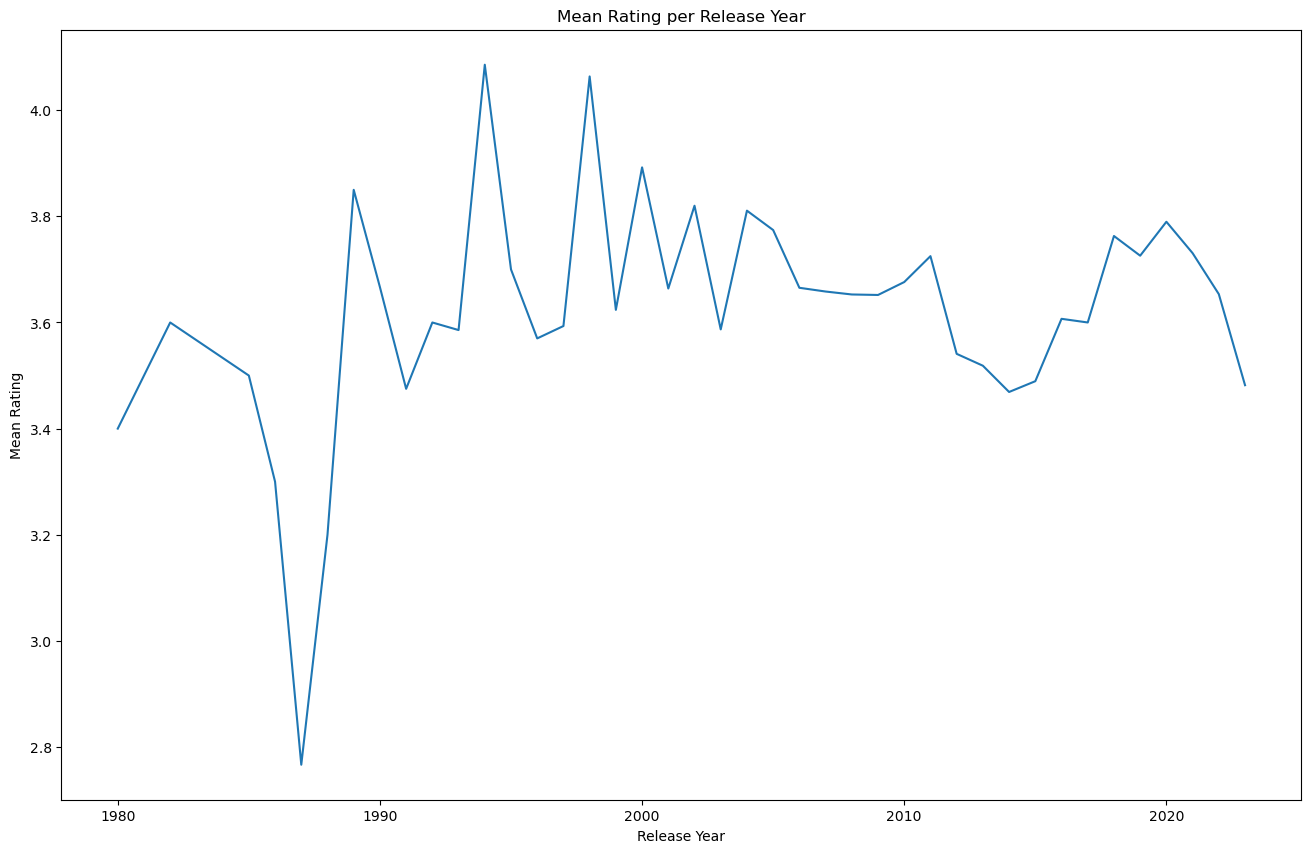

In [29]:
# Mean Rating

mean_ratings = games.groupby('Release Year')['Rating'].mean()
df_mean_ratings = pd.DataFrame(mean_ratings)
plt.figure(figsize = (16,10))
sns.lineplot(data = df_mean_ratings, x = 'Release Year', y = 'Rating')
plt.title('Mean Rating per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Mean Rating')

plt.show()

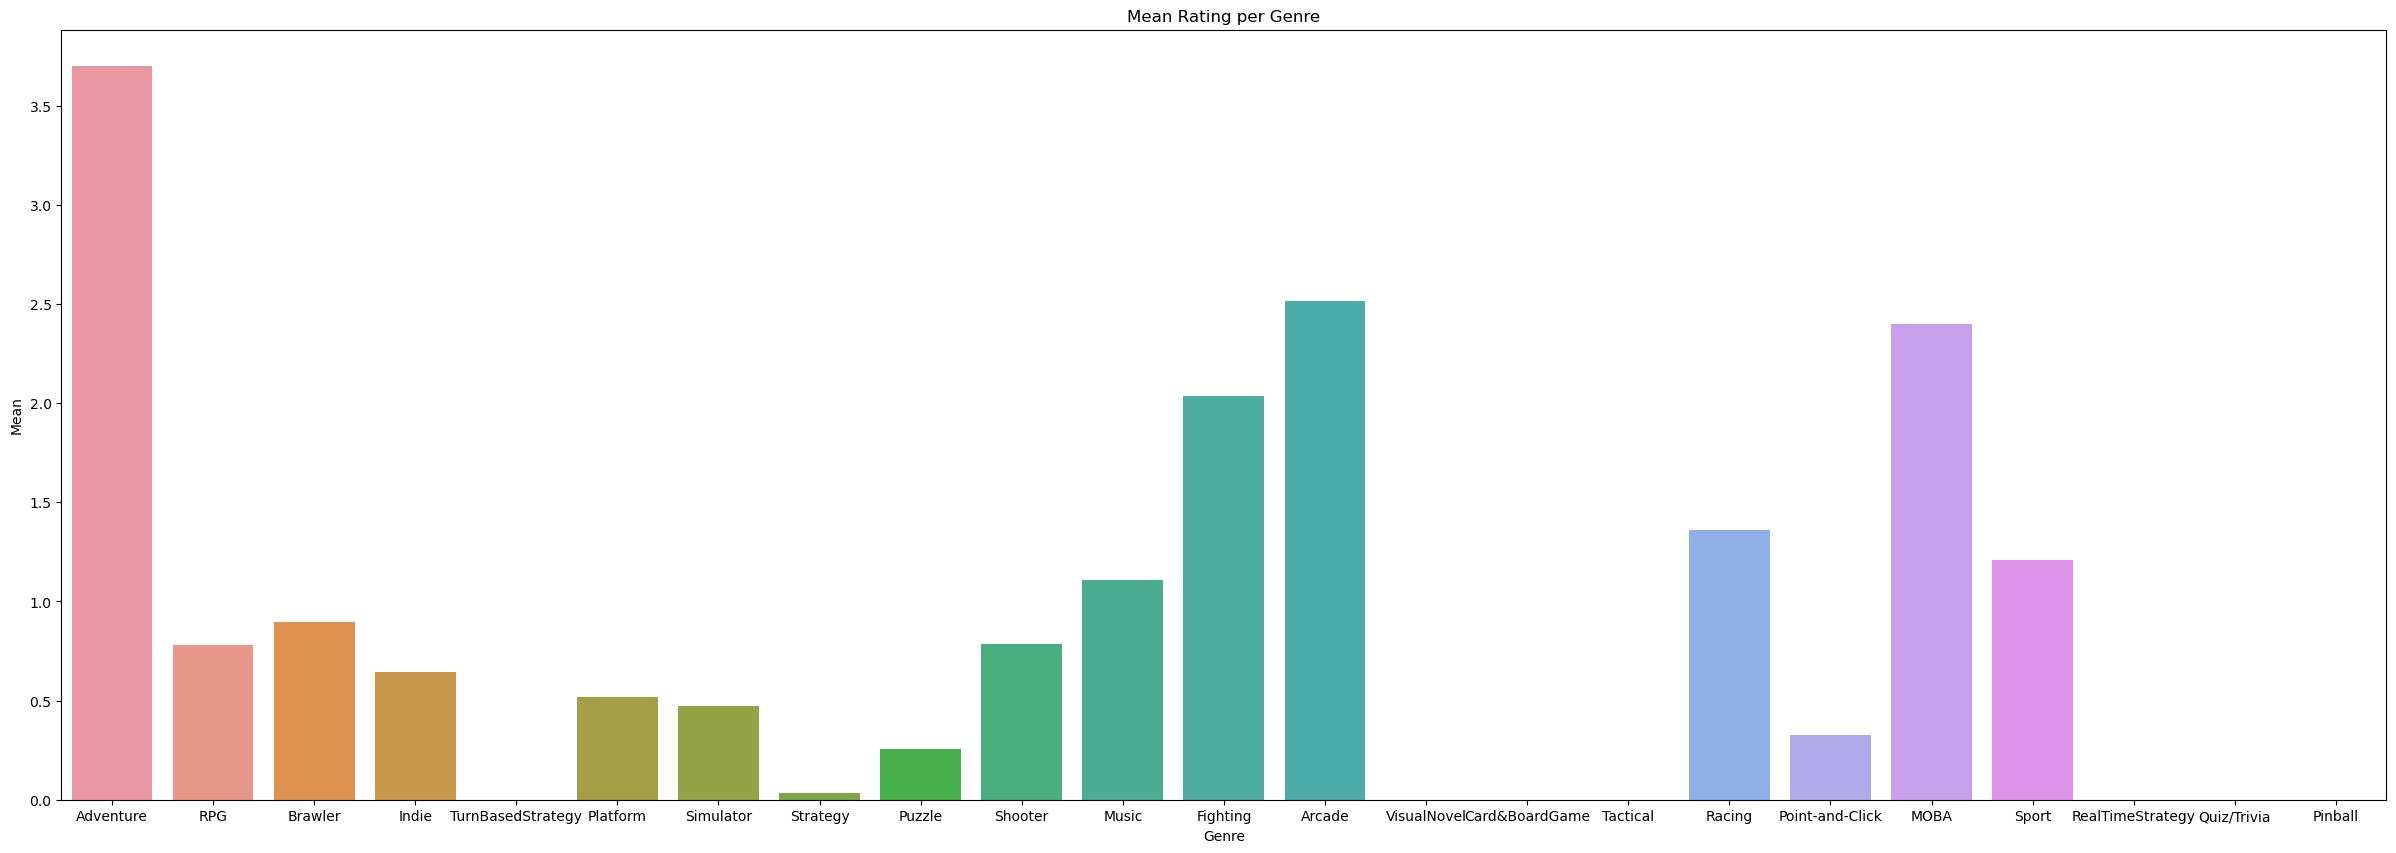

In [30]:
# Genre Rating

genre_ratings = {}

for genre in genres_dict:
    tot_games = genres_dict[genre]
    sum_rating = 0
    
    for index,rows in games.iterrows():
        
        if genre in rows['Genres']:
            sum_rating += rows['Rating']
            
    avg_rating = sum_rating / tot_games
    genre_ratings[genre] = avg_rating
        
df_genre_ratings = pd.DataFrame({'Genre': genre_ratings.keys(), 'Mean Rating': genre_ratings.values()})
plt.figure(figsize = (30,10))
sns.barplot(data = df_genre_ratings, x = 'Genre', y = 'Mean Rating')
plt.title('Mean Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Mean')

plt.show()

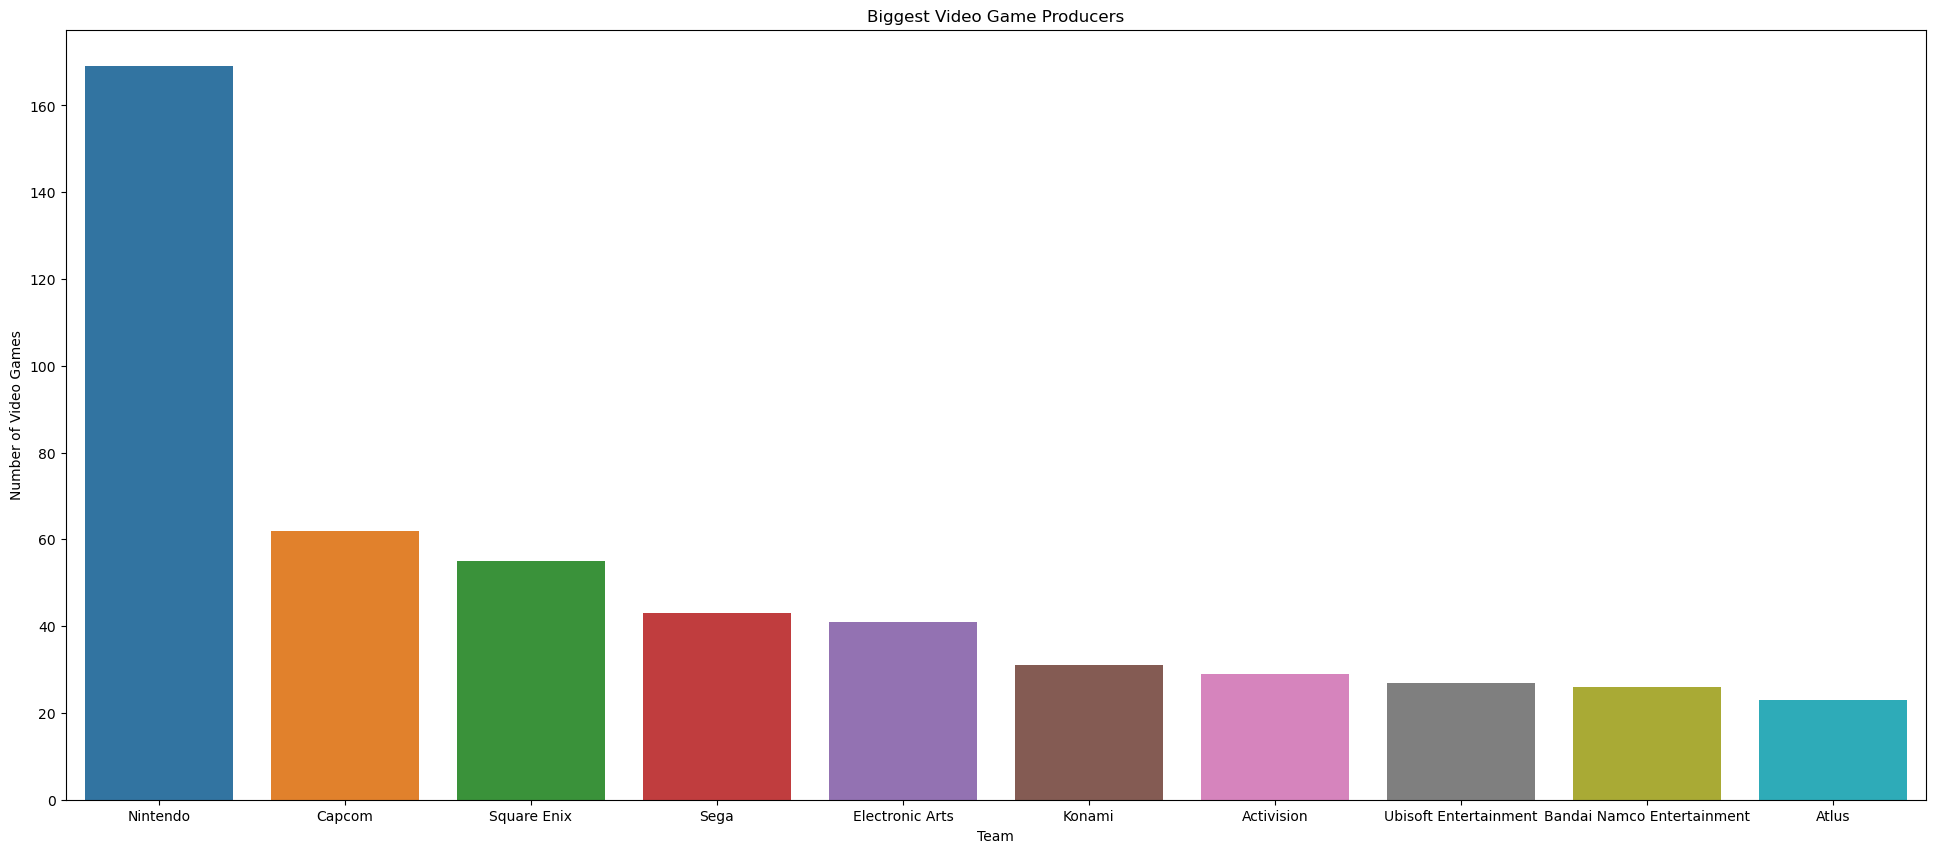

In [31]:
## Team total

team_list = list(team_dict.keys())
team_count_list = list(team_dict.values())

df_teams = pd.DataFrame({'Team' : team_list, 'Number of Video Games' : team_count_list})
most_games_teams = df_teams.nlargest(10, 'Number of Video Games')
plt.figure(figsize = (24, 10))
sns.barplot(data = most_games_teams, x = 'Team', y = 'Number of Video Games')
plt.xlabel('Team')
plt.ylabel('Number of Video Games')
plt.title('Biggest Video Game Producers')

plt.show()

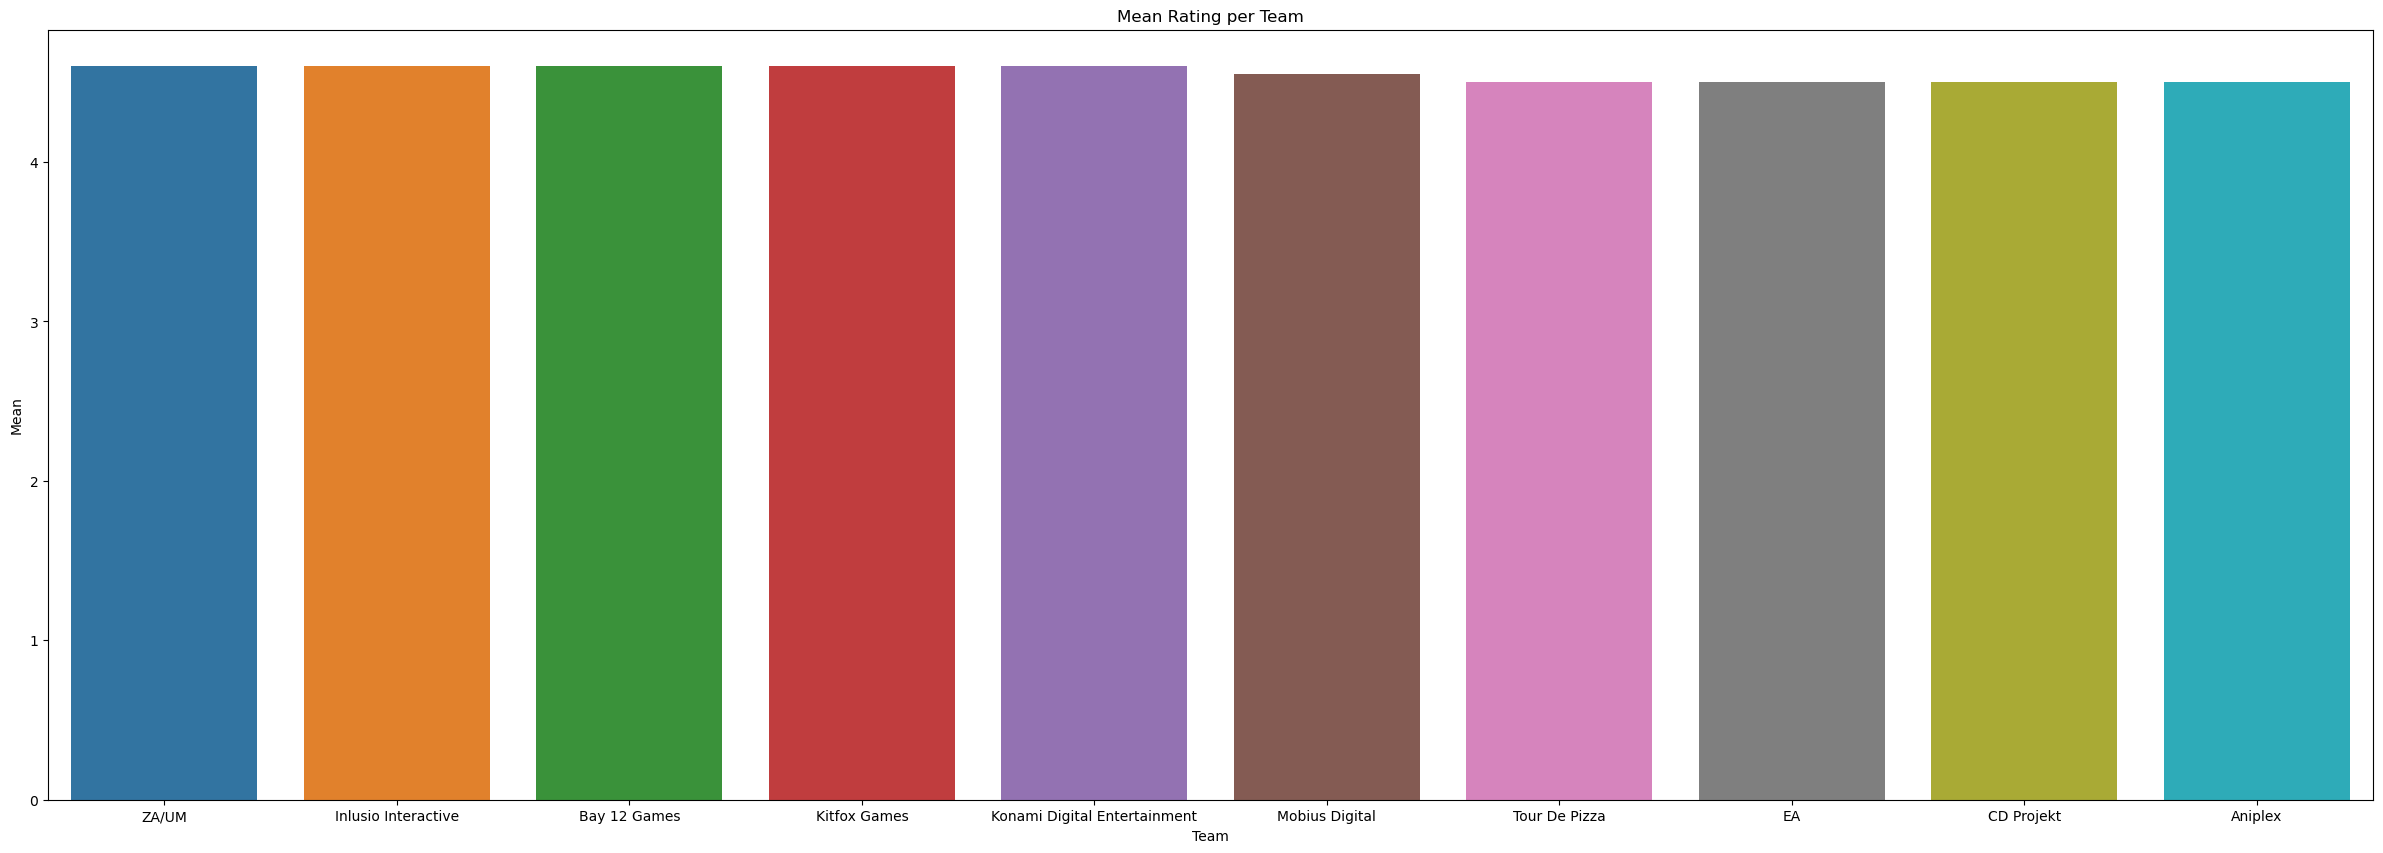

In [32]:
# Team Rating

team_ratings = {}

for team in team_dict:
    tot_games = team_dict[team]
    sum_rating = 0
    
    for index,rows in games.iterrows():    
        if team in rows['Team']:  
            sum_rating += rows['Rating']
            
    avg_rating = sum_rating / tot_games
    team_ratings[team] = round(avg_rating, 2)
        
df_team_ratings = pd.DataFrame({'Team': team_ratings.keys(), 'Mean Rating': team_ratings.values()})
top_10_team_ratings = df_team_ratings.nlargest(10, 'Mean Rating')

plt.figure(figsize = (30,10))
sns.barplot(data = top_10_team_ratings, x = 'Team', y = 'Mean Rating')
plt.title('Mean Rating per Team')
plt.xlabel('Team')
plt.ylabel('Mean')

plt.show()

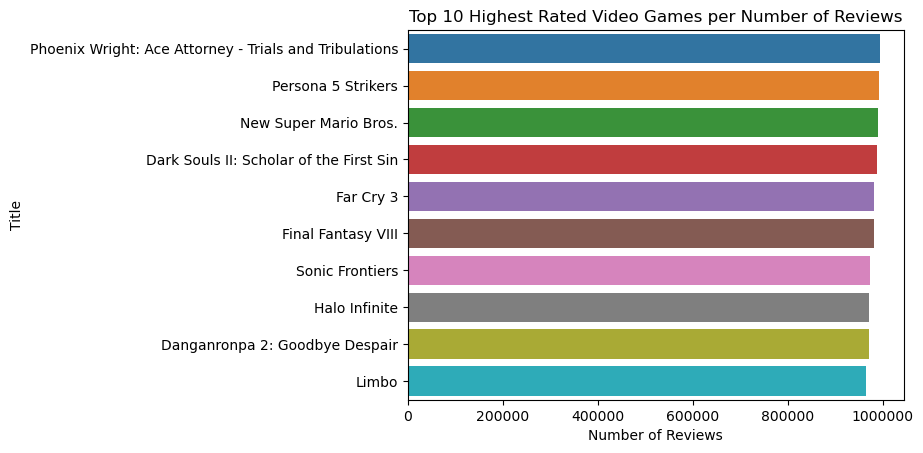

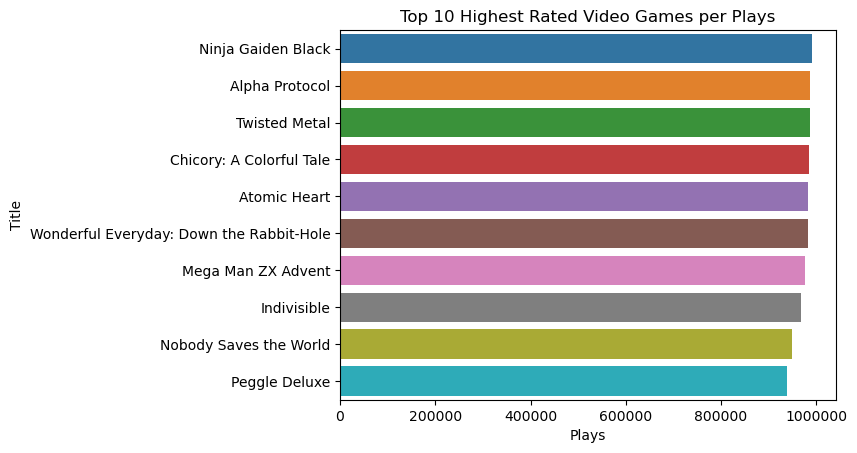

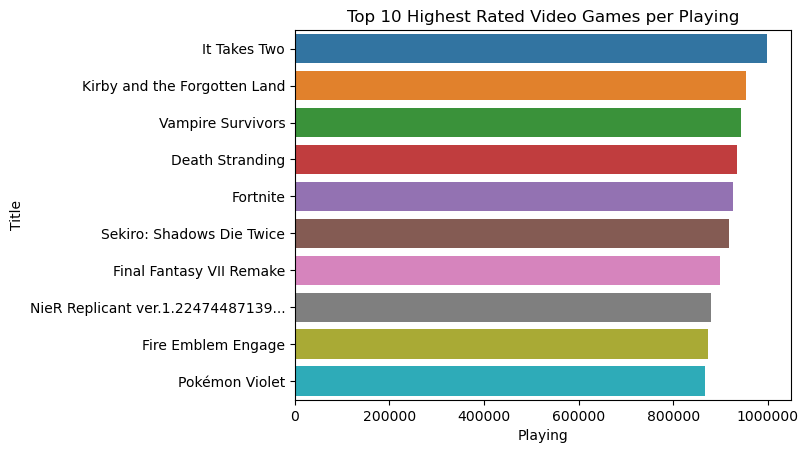

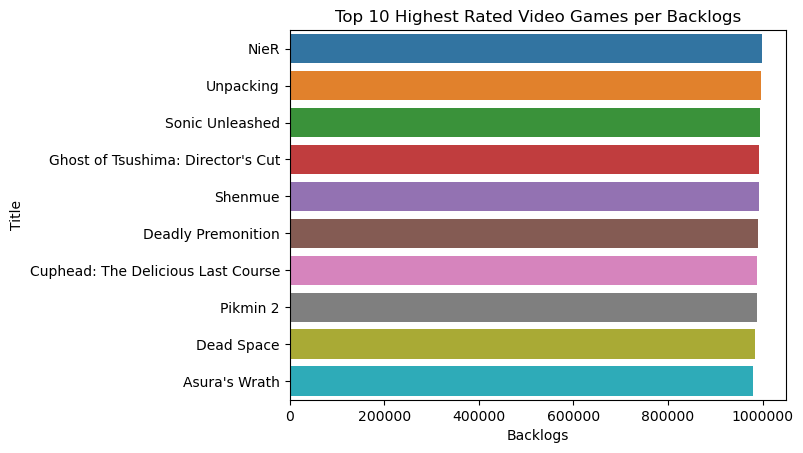

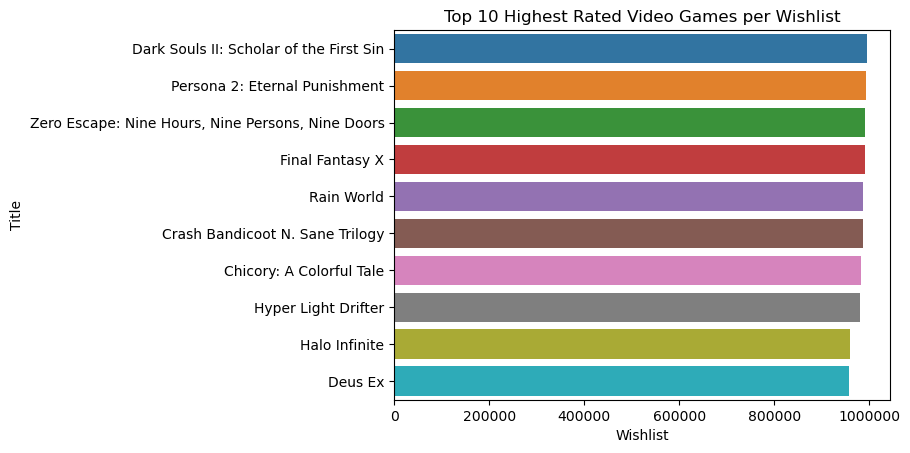

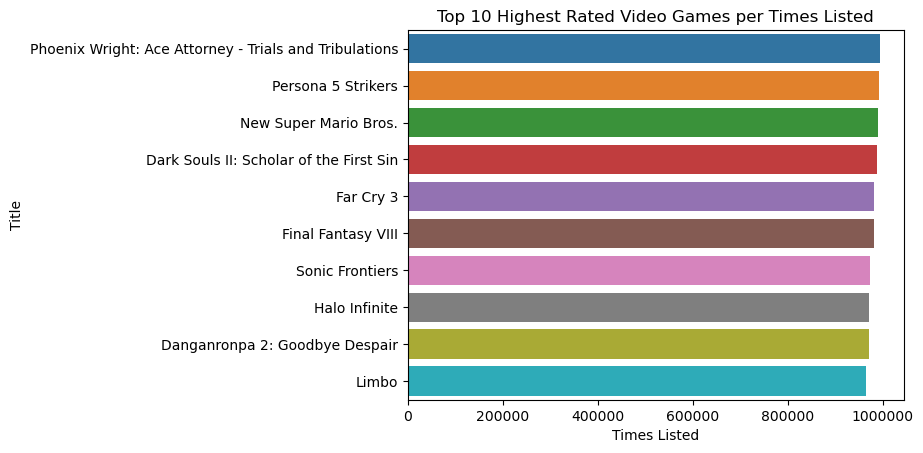

In [33]:
### Top 10 Games per Column

for col in k_columns:
    
    df_top_x = games.nlargest(10, col)
    sns.barplot(data = df_top_x, x = col , y = 'Title')
    plt.title('Top 10 Highest Rated Video Games per '+col)
    plt.xlabel(col)
    plt.ylabel('Title') 
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()

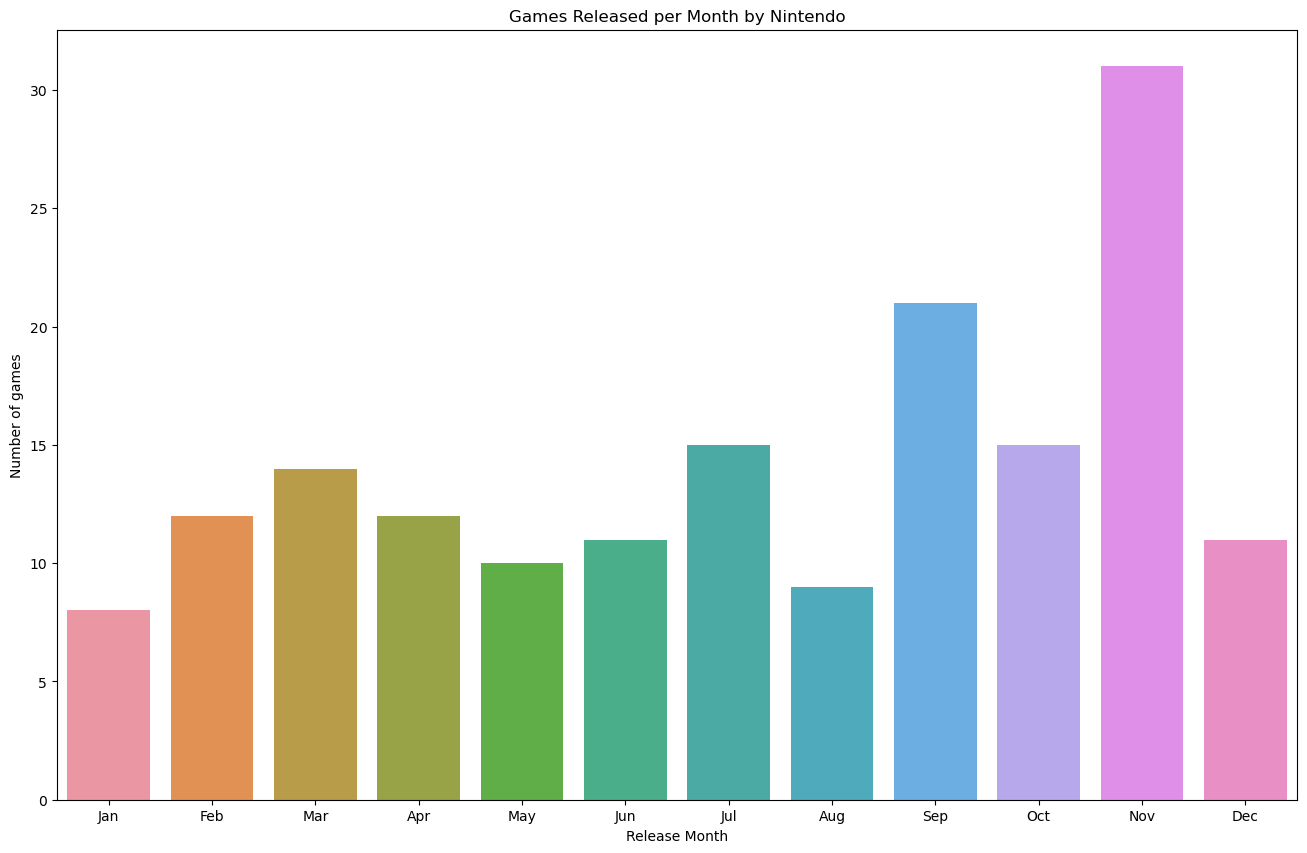

In [34]:
## Just Nintendo Graphs since produces most games

nintendo = games[games['Team'].apply(lambda x: 'Nintendo' in x)]

# Nintendo per Month 

nintendo_per_month = nintendo.groupby('Release Month').size().reindex(months)
nintendo_per_month = pd.DataFrame({'Release Month': months, 'Number of Games': nintendo_per_month.values})

plt.figure(figsize = (16, 10))

plt.title('Games Released per Month by Nintendo')

sns.barplot(data = nintendo_per_month, x = 'Release Month' , y = 'Number of Games')

plt.xlabel('Release Month')

plt.ylabel('Number of games')

plt.show()

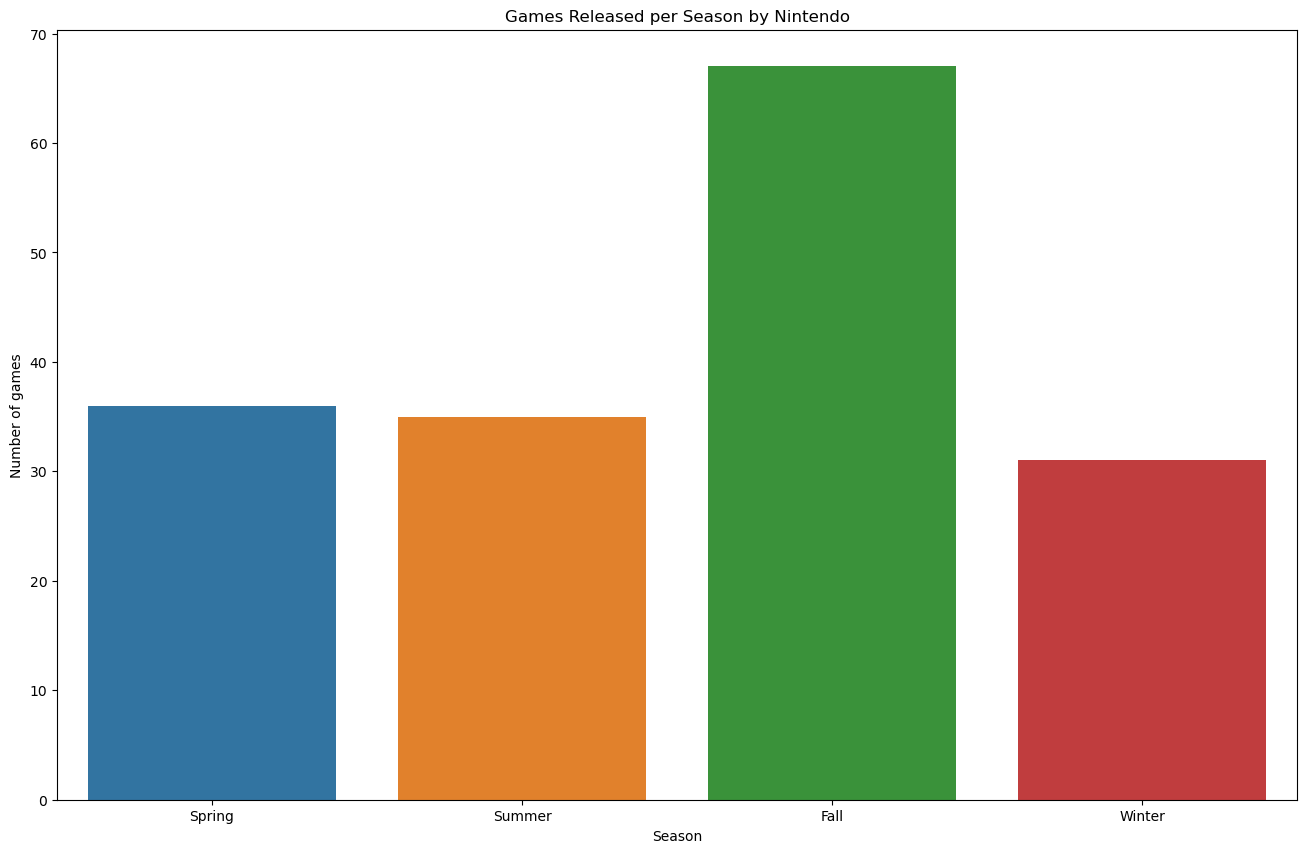

In [35]:
# Nintendo per season

nintendo_per_season = nintendo.groupby('Season').size().reindex(seasons)
nintendo_per_season = pd.DataFrame({'Season': seasons, 'Number of Games': nintendo_per_season.values})

plt.figure(figsize = (16, 10))

plt.title('Games Released per Season by Nintendo')

sns.barplot(data = nintendo_per_season, x ='Season', y = 'Number of Games')

plt.xlabel('Season')

plt.ylabel('Number of games')

plt.show()

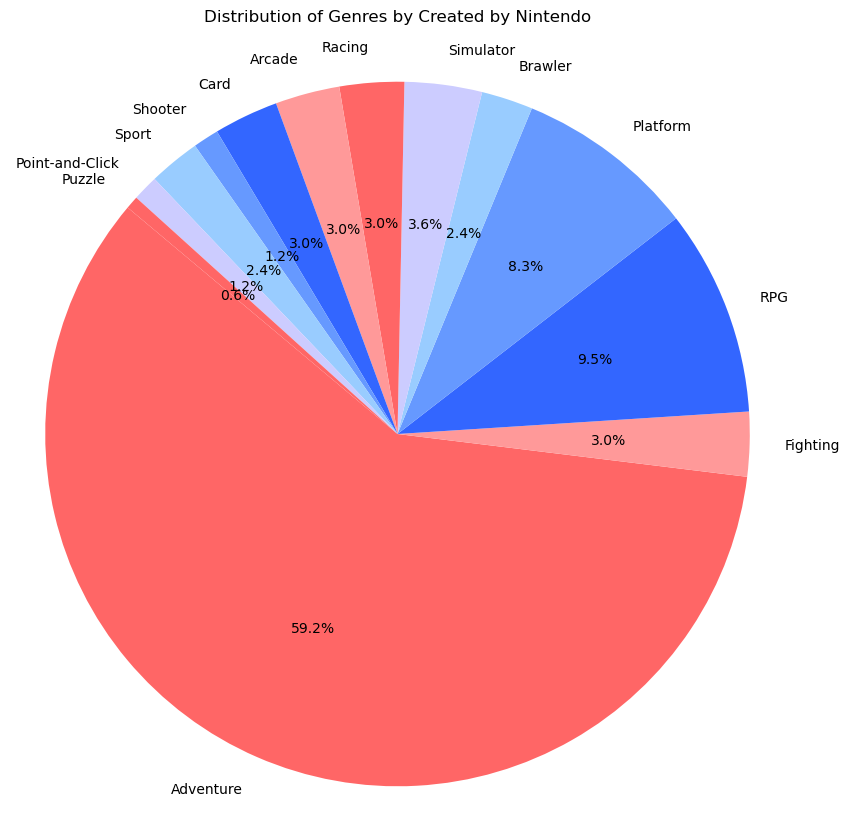

In [36]:
# Nintendo Genres Total

nintendo_genres_dict = {}

# Iterate through the 'Genres' column
for nintendo_genre_list in nintendo['Genres']:
    
    # The variables within the Genres column are seen as lists, but the type is actually
    # string, so we must remove the brackets and quotes, and then seperate the two
    # in order to be able to get the individual genres as keys
    nintendo_genre_list = nintendo_genre_list.replace('[', '').replace(' ','').replace(']', '').replace("'", '').split(',')
    
    # Iterate through individual genres in the list
    for genre in nintendo_genre_list:
        
        if genre != '':
            if genre in nintendo_genres_dict:
                nintendo_genres_dict[genre] += 1
            else:
                nintendo_genres_dict[genre] = 1

nintendo_genres_list = list(nintendo_genres_dict.keys())
nintendo_genres_count_list = list(nintendo_genres_dict.values())

df_nintendo_genres = pd.DataFrame({'Genre': nintendo_genres_list, 'Number of Video Games': nintendo_genres_count_list})
df_nintendo_genres['Percentage'] = ((df_nintendo_genres['Number of Video Games'] / df_nintendo_genres['Number of Video Games'].sum()) * 100)
plt.figure(figsize = (10,10))
patches, texts, autotexts = plt.pie(df_nintendo_genres['Number of Video Games'], labels = df_nintendo_genres['Genre'], autopct='%1.1f%%', startangle=140, colors = ['#FF6666', '#FF9999', '#3366FF', '#6699FF', '#99CCFF', '#CCCCFF'])
plt.axis('equal')

for autotext in autotexts: 
    autotext.set_text(f'{autotext.get_text()}')

plt.title('Distribution of Genres by Created by Nintendo', pad=20)

plt.show()

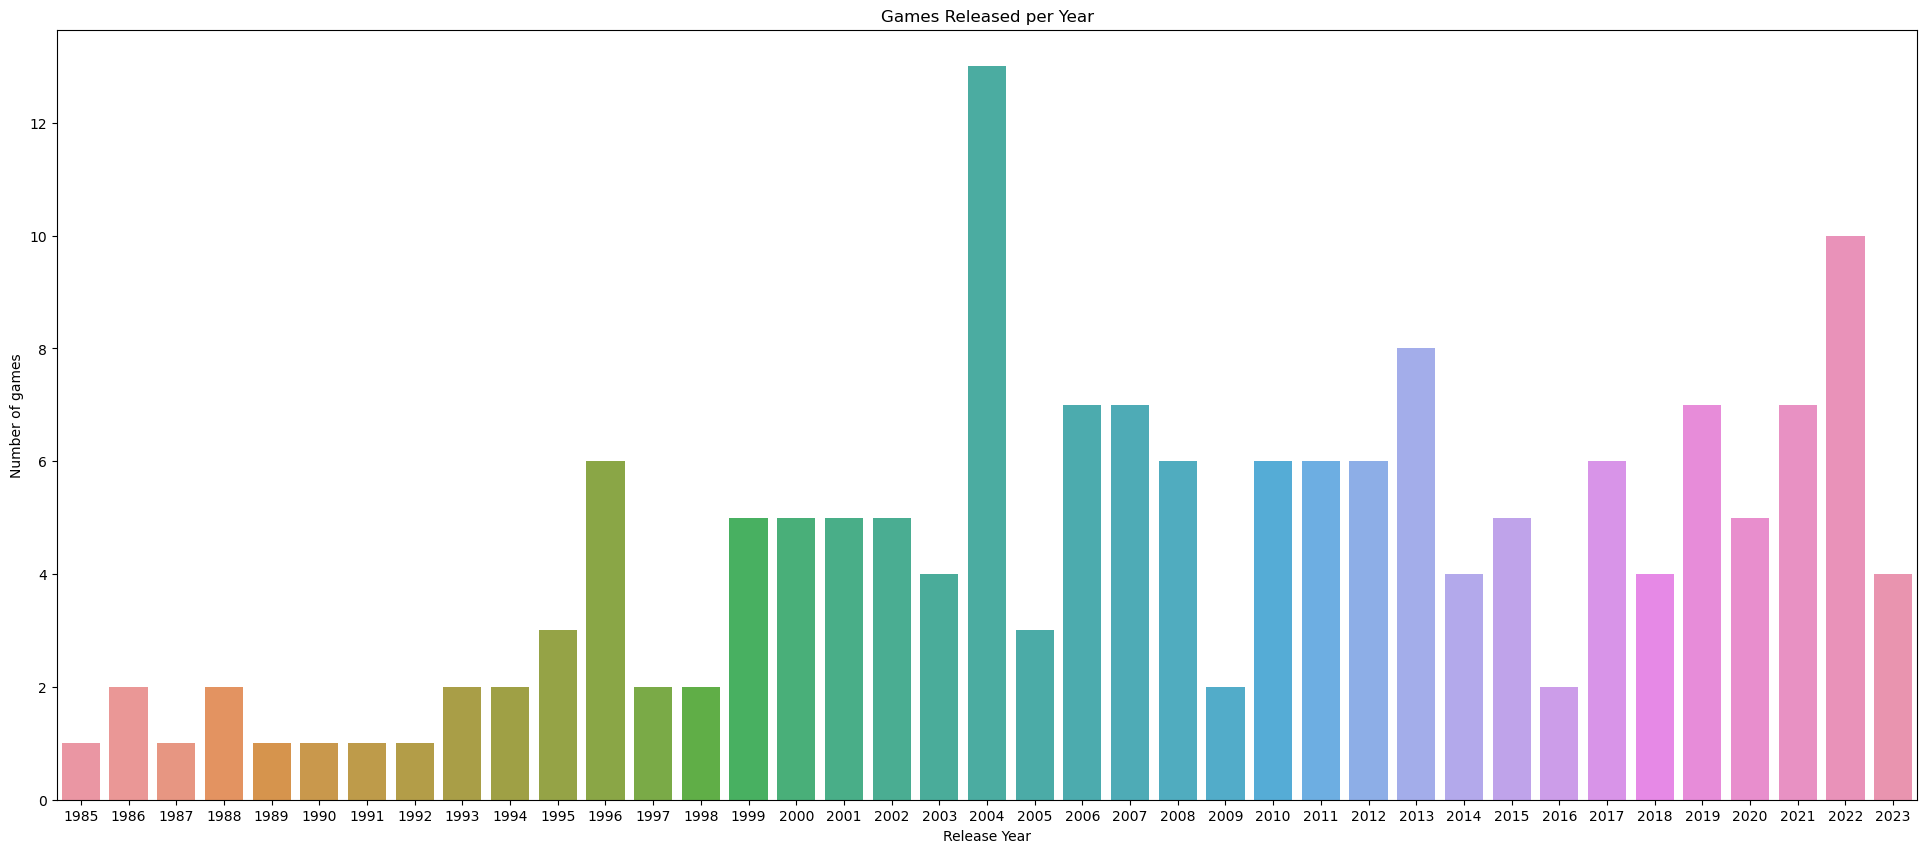

In [37]:
# Nintendo Per Year

# Group by Release Year
nintendo_per_year = nintendo['Release Year'].value_counts().reset_index().sort_values('Release Year')
nintendo_per_year.columns = ['Release Year', 'Number of Games']

plt.figure(figsize = (24, 10))
plt.title('Games Released per Year')
sns.barplot(data = nintendo_per_year, x ='Release Year', y = 'Number of Games')
plt.xlabel('Release Year')
plt.ylabel('Number of games')

plt.show()

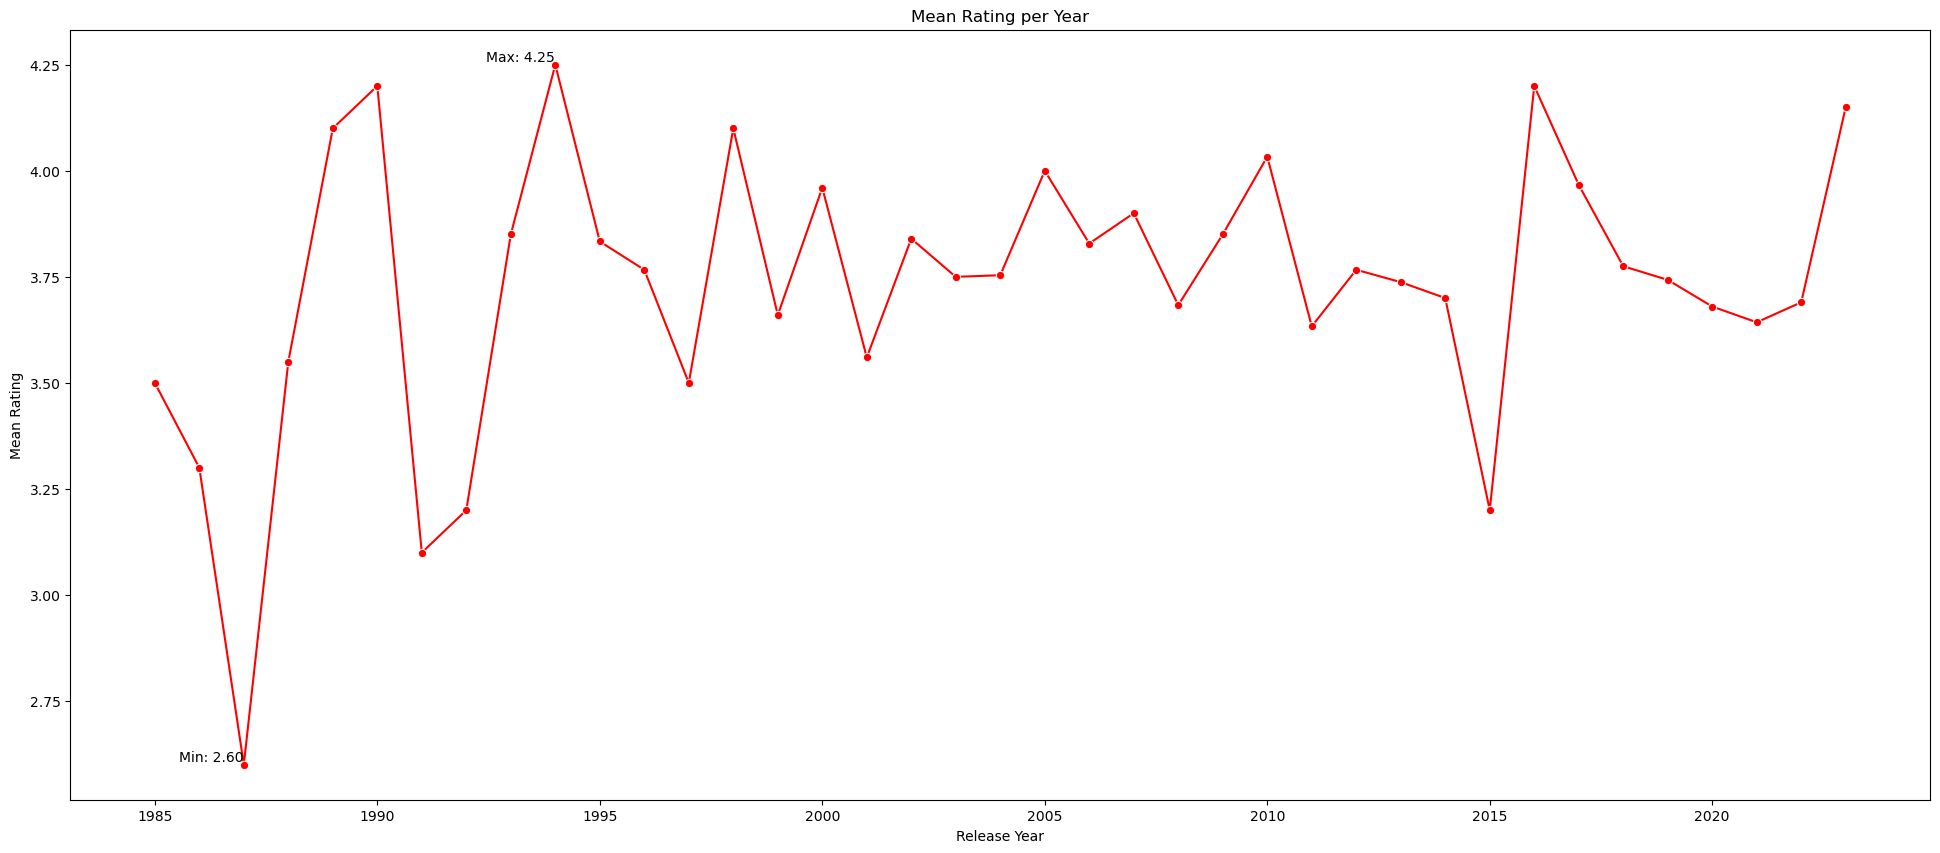

In [38]:
# Nintendo Mean Rating per Year
mean_rating_per_year = nintendo.groupby('Release Year')['Rating'].mean().reset_index().sort_values('Release Year')

plt.figure(figsize = (24, 10))
plt.title('Mean Rating per Year')
sns.lineplot(data = mean_rating_per_year, x = 'Release Year', y = 'Rating', color ='red', marker = 'o')

# Finding indices of min and max ratings
min_index = mean_rating_per_year['Rating'].idxmin()
max_index = mean_rating_per_year['Rating'].idxmax()

# Adding text annotations for min and max values
min_rating = mean_rating_per_year.loc[min_index, 'Rating']
max_rating = mean_rating_per_year.loc[max_index, 'Rating']

plt.text(mean_rating_per_year.loc[min_index, 'Release Year'], min_rating, f'Min: {min_rating:.2f}', ha='right', va='bottom', color='black')
plt.text(mean_rating_per_year.loc[max_index, 'Release Year'], max_rating, f'Max: {max_rating:.2f}', ha='right', va='bottom', color='black')
plt.xlabel('Release Year')
plt.ylabel('Mean Rating')

plt.show()

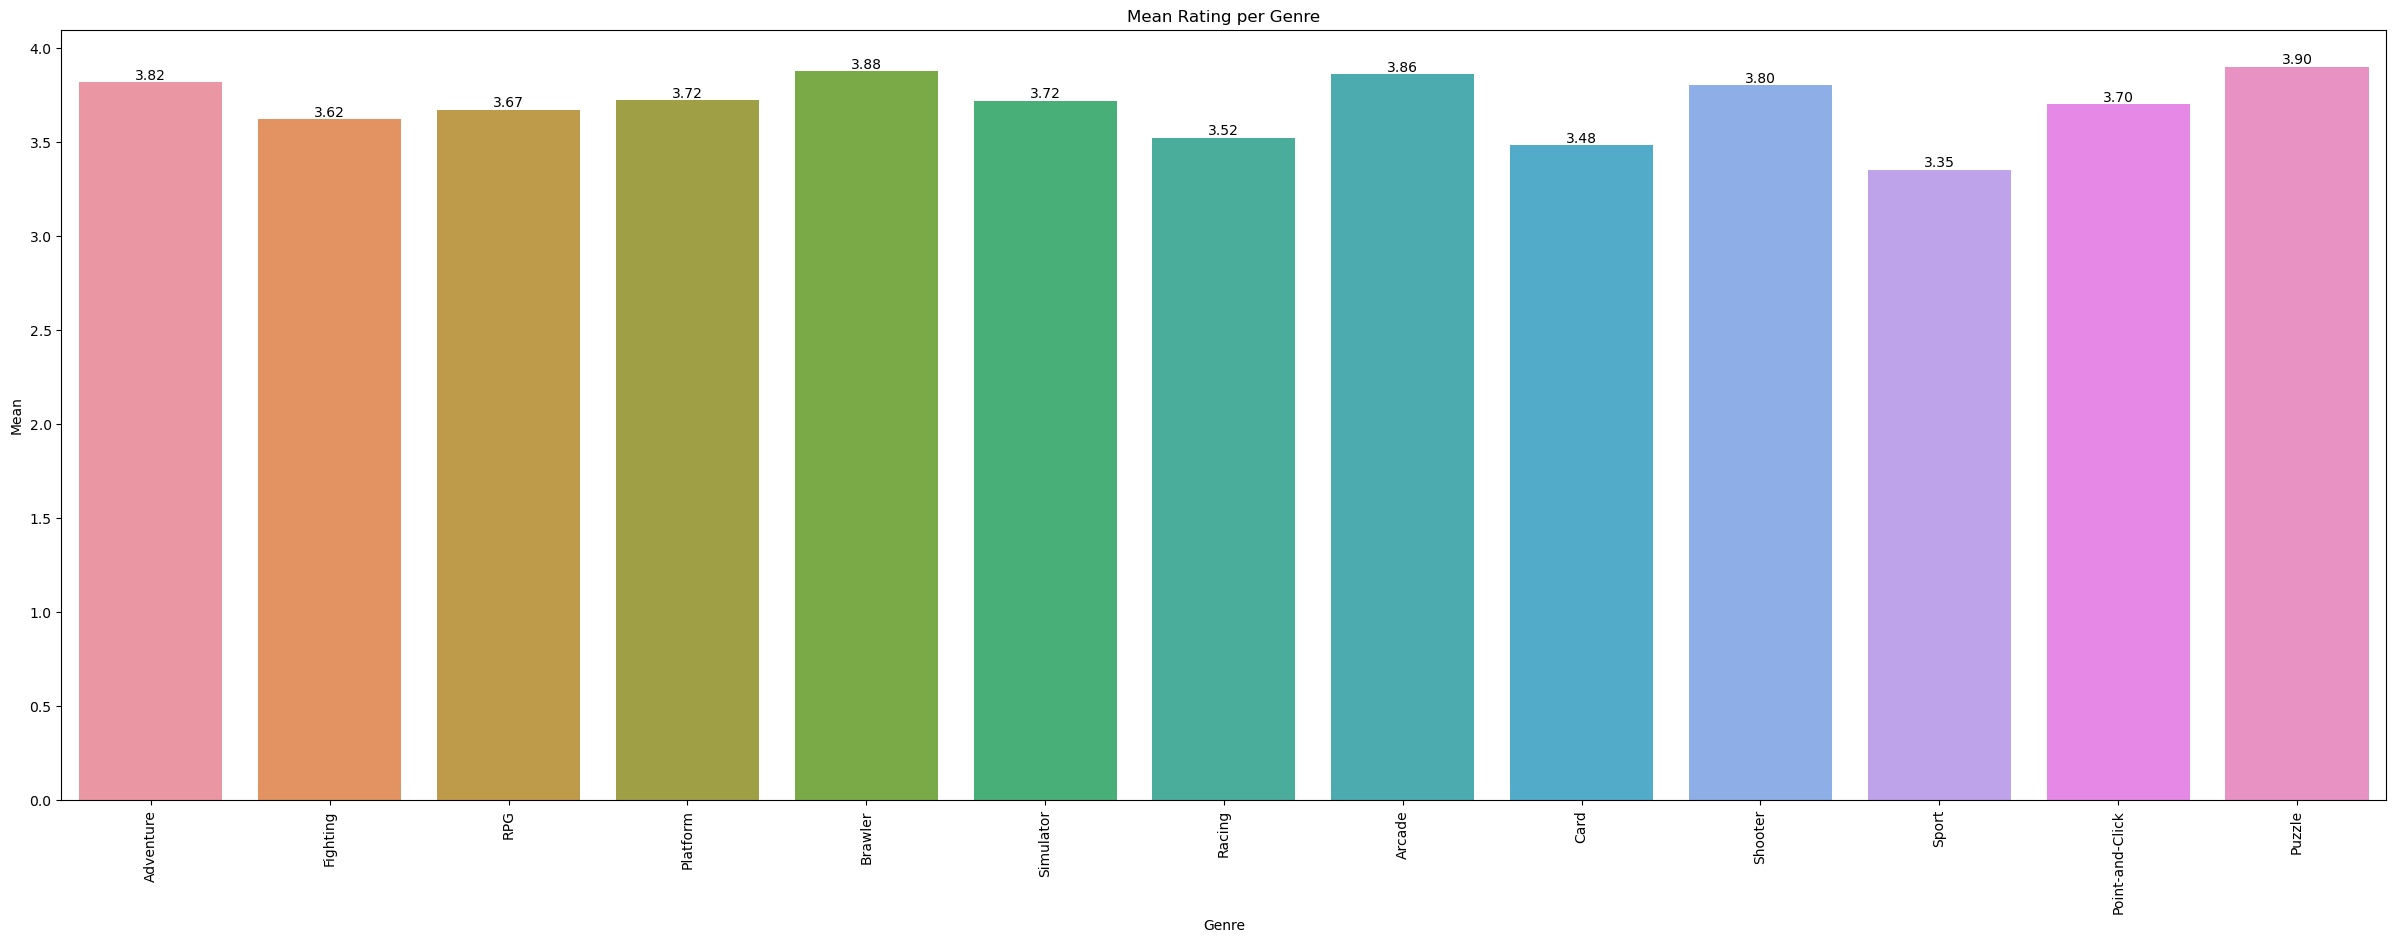

In [39]:
# Nintendo Mean Rating per Genre

nintendo_genre_ratings = {}

for genre in nintendo_genres_dict:
    tot_games = nintendo_genres_dict[genre]
    sum_rating = 0
    
    for index,rows in nintendo.iterrows():
        
        if genre in rows['Genres']:   
            sum_rating += rows['Rating']
            
    avg_rating = sum_rating / tot_games
    nintendo_genre_ratings[genre] = avg_rating
        
df_nintendo_genre_ratings = pd.DataFrame({'Genre': nintendo_genre_ratings.keys(), 'Mean Rating': nintendo_genre_ratings.values()})

plt.figure(figsize = (30,10))
sns.barplot(data = df_nintendo_genre_ratings, x = 'Genre', y = 'Mean Rating')
plt.title('Mean Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Mean')

# In order to add text

for index, row in df_nintendo_genre_ratings.iterrows():
    plt.text(index, row['Mean Rating'], f'{row["Mean Rating"]:.2f}', color='black', ha="center", va="bottom")
    
plt.xticks(rotation=90) 

plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_6100\1758994237.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = games_clean.corr()


<Axes: >

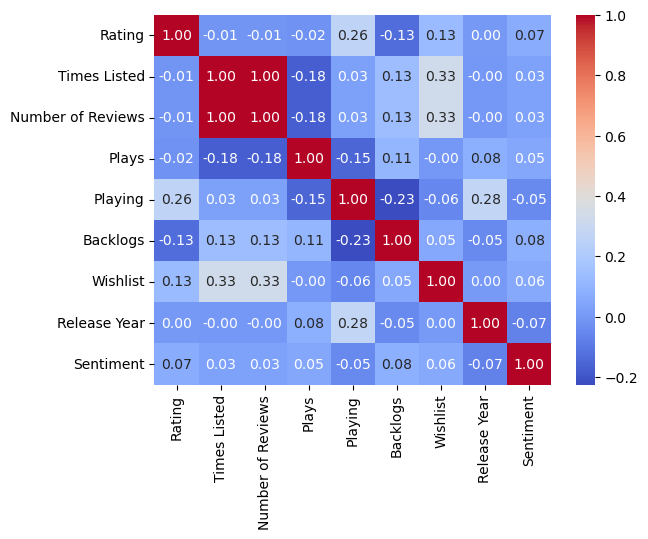

In [40]:
#plot the pearson correlation of the numeric variables in the dataset 
corr_matrix = games_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

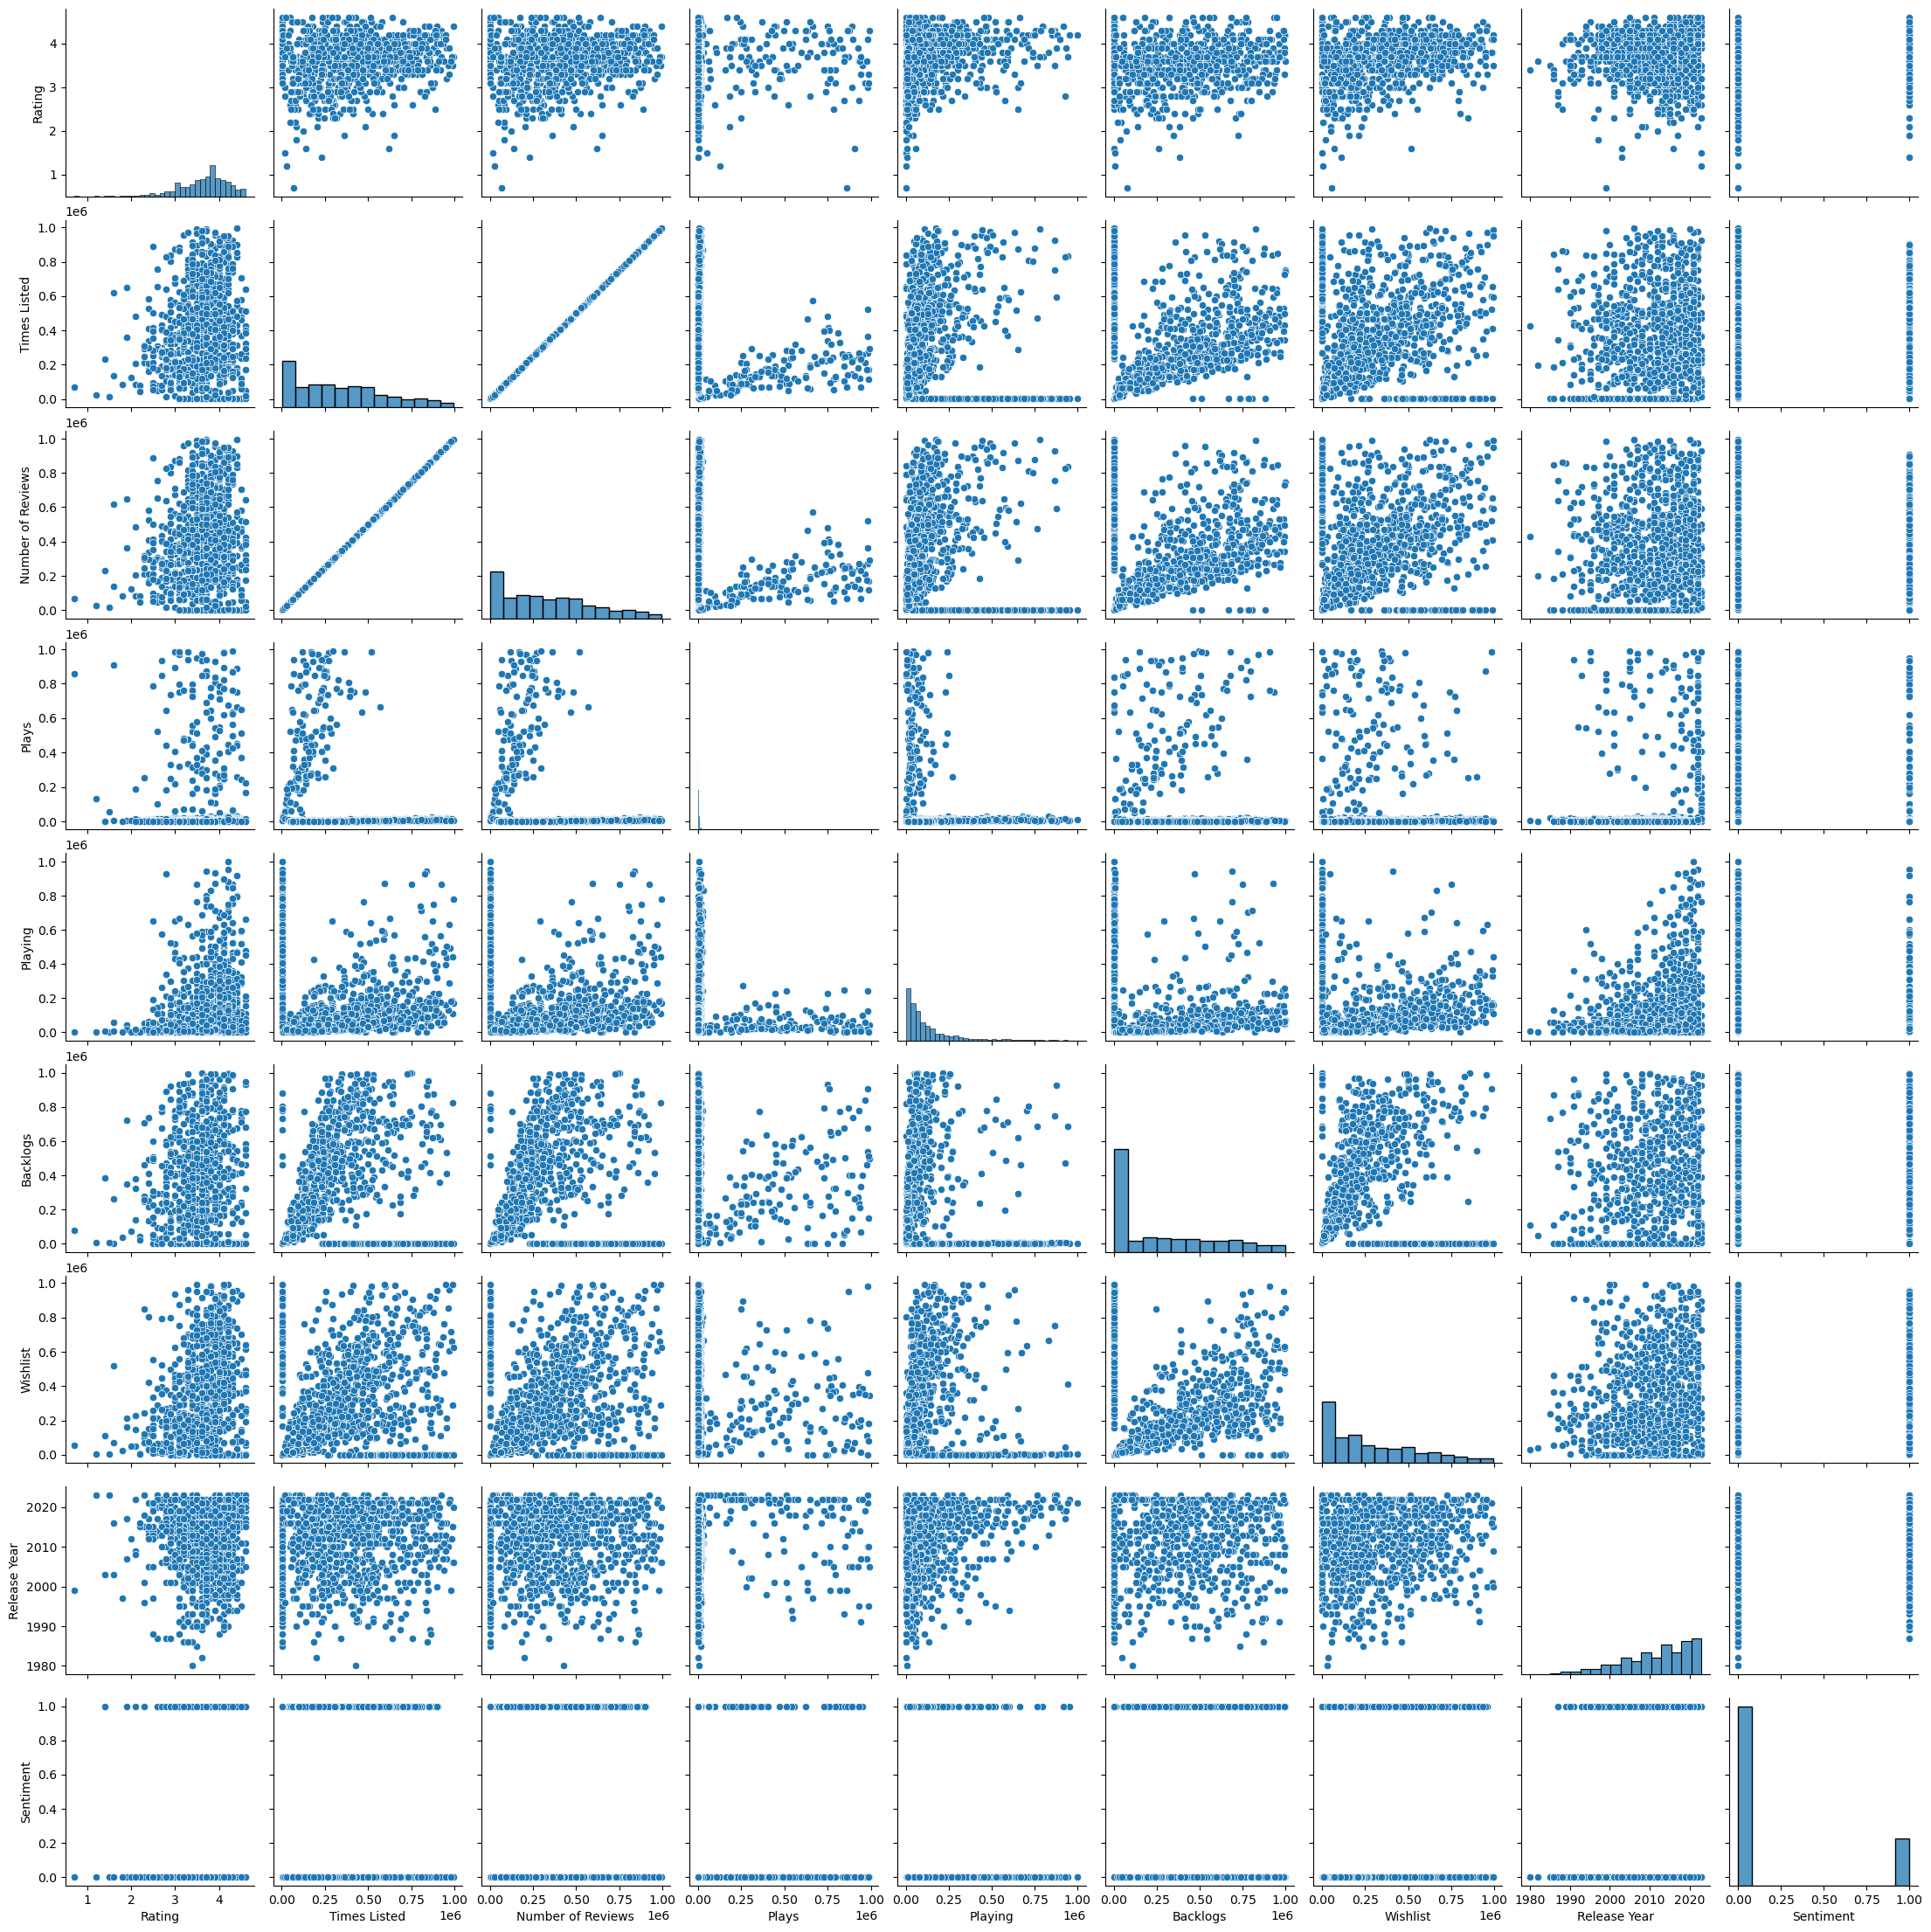

In [41]:
# constructing pair plots for seeing the distirbution of one and the relationship of two variables for all the variables
p=sns.pairplot(games_clean)
# the lack of clear direction and too wide scattering of the data points for all the pair plots visualizes the very low 
# correlation observed in the pearson correlation heat map
# in addition there are no variables with normal or even unskewed distributions 

In [42]:
# Scaling the numeric variables using a standard scaler (for achiving mean = 0 and SD = 1) since they are two magniutdes 
# larger than the dummy variables
from sklearn.preprocessing import StandardScaler

scaling_columns = ['Playing', 'Backlogs', 'Wishlist', 'Plays', 'Number of Reviews']
 
st_sc = StandardScaler()
games_clean[scaling_columns] = st_sc.fit_transform(games_clean[scaling_columns])

In [43]:
games_clean.head()

,Title,Team,Rating,Times Listed,Number of Reviews,Genres,Reviews,Plays,Playing,Backlogs,Wishlist,Season,Release Month,Release Year,Sentiment
0,Elden Ring,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,-1.255451,Adventure,"[""The first playthrough of elden ring is one o...",-0.280160,-0.775843,-0.878538,-1.090593,Winter,Feb,2022,0
1,Hades,[Supergiant Games],4.3,2900,-1.259193,Adventure,['convinced this is a roguelike for people who...,-0.260362,-0.779174,-0.872907,-1.095110,Winter,Dec,2019,1
2,The Legend of Zelda: Breath of the Wild,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,-1.253955,Adventure,['This game is the game (that is not CS:GO) th...,-0.215817,-0.783060,-0.877213,-1.098873,Spring,Mar,2017,0
3,Undertale,"[tobyfox, 8-4]",4.2,3500,-1.256948,Adventure,['soundtrack is tied for #1 with nier automata...,-0.225716,2.972678,-0.877544,-1.101885,Fall,Sep,2015,0
4,Hollow Knight,[Team Cherry],4.4,3000,-1.258819,Adventure,"[""this games worldbuilding is incredible, with...",-0.260362,-0.783615,-0.866282,-1.100003,Winter,Feb,2017,1


In [44]:
###################### MODEL BUILDING AND TESTING #######################

#despite more than suboptimal correlation between the variables (espceically towards our dependent varaible "Rating") 
#we tried to build a regression model to try out the workings of this final step in the process

In [45]:
#Import libraries for builiding, training and testing the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
# Assign the dependent variable for the regression
y = games["Rating"]

In [47]:
# Exclude all columns that are not interesting predictiors, not applicable (Times listed has perfect correlation with Number of Reviews) or were converted into dummy variables  
X = games.drop(["Title", "Rating", "Reviews", "Team", "Times Listed"], axis=1)
X = pd.get_dummies(X, columns=['Genres',"Release Month", "Season"], drop_first=True)

In [48]:
#Splitting the data to get training and test set wiht dependent and independent variables
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Create and train the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions on the test data
y_pred = lin_model.predict(X_test)

In [51]:
# Mean Squared Error (MSE) to evaluate the tested model
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.2513206778039006


In [52]:
%pip install statsmodels
import statsmodels.api as sm

Note: you may need to restart the kernel to use updated packages.


In [53]:
# Fit a least square regression model to get coefficients and their p-values
X = sm.add_constant(X) #incuding a constant to account for bias
lin_model = sm.OLS(y, X).fit()

# Get the summary results
summary = lin_model.summary()
print(summary)

# the really low R-squared shows that the proportion of the variance of Ratings explained by the model build on our 
# independent variables is very low

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     4.765
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           3.42e-18
Time:                        12:42:51   Log-Likelihood:                -780.82
No. Observations:                1083   AIC:                             1638.
Df Residuals:                    1045   BIC:                             1827.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

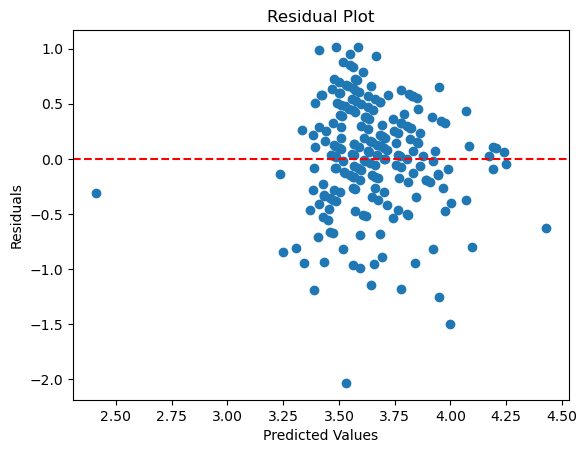

<Figure size 640x480 with 0 Axes>

In [54]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
plt.savefig("C:/Users/david/OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli/David Master/Python and R for Data Science/Python Documentation/residualplot.png")